In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from soccer import soccer_game
from qlearner import QLearner
from friendq import FriendQ
from foeq import FoeQ
from ceq import ceQ
from training import *

### Q-Learning

In [2]:
env = soccer_game()
learner_q = QLearner(env.nS, env.nA)

hist_q = learning_2005(learner_q, env, epsilon=0.01, max_iteration=1000000)

100%|██████████| 1000000/1000000 [01:29<00:00, 11156.46it/s]


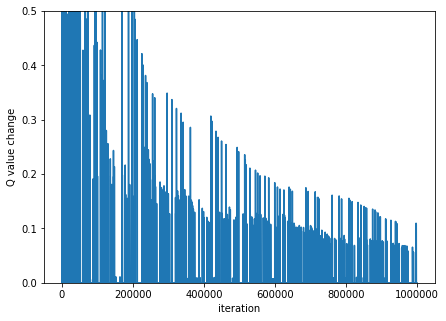

In [3]:
plot_error(hist_q, "figures/Q_2005.png")

### Friend-Q

In [4]:
env = soccer_game()
learner_friendQ = FriendQ(env.nS, env.nA)

hist_friendQ = learning_2005(learner_friendQ, env, epsilon=1, max_iteration=1000000)

100%|██████████| 1000000/1000000 [00:57<00:00, 17487.40it/s]


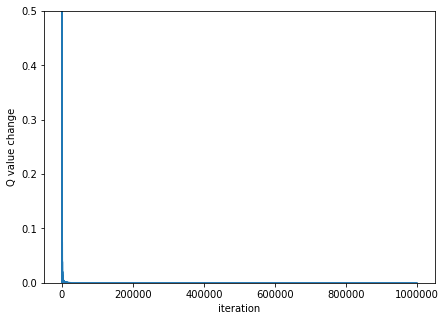

In [5]:
plot_error(hist_friendQ, "figures/friendQ_2005.png")

In [6]:
# Q table for state 71
show_table(learner_friendQ.agents[0].Q[71])
show_table(learner_friendQ.agents[1].Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,9.0,10.0,8.536,9.000,9.000
W,9.0,10.0,8.768,9.000,8.998
E,9.0,10.0,-0.796,9.000,9.000
N,9.0,10.0,8.537,9.000,9.000
S,9.0,10.0,8.097,8.999,9.000


player B,stick,W,E,N,S
player A,,,,,
stick,8.540,-10.0,9.000,8.540,8.097
W,8.538,-10.0,8.770,8.540,8.097
E,8.099,-10.0,9.491,8.099,8.100
N,8.540,-10.0,8.999,8.539,8.100
S,8.100,-10.0,9.000,8.098,8.534


In [7]:
# Player 2's action
learner_friendQ.agents[1].select_action(71)

2

### Foe-Q

In [8]:
env = soccer_game()
learner_foeQ = FoeQ(env.nS, env.nA)

hist_foeQ = learning_2005(learner_foeQ, env, epsilon=1, max_iteration=1000000)

100%|██████████| 1000000/1000000 [14:27<00:00, 1152.12it/s]


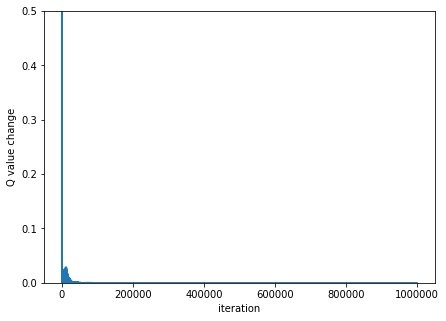

In [9]:
plot_error(hist_foeQ, "figures/foeQ_2005.png")

In [10]:
# Q value for state(71)
show_table(learner_foeQ.agent1.Q[71])
show_table(learner_foeQ.agent2.Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,-2.290,-2.279,-3.067,-2.283,-2.860
W,10.000,10.000,10.000,10.000,10.000
E,2.231,-0.023,-9.062,2.227,-3.026
N,-2.279,-2.279,-3.067,-2.284,-2.854
S,-3.188,-5.421,-7.114,-3.183,-2.260


player B,stick,W,E,N,S
player A,,,,,
stick,2.290,-10.0,-2.231,2.279,3.188
W,2.279,-10.0,0.023,2.279,5.421
E,3.067,-10.0,9.062,3.067,7.114
N,2.283,-10.0,-2.227,2.284,3.183
S,2.860,-10.0,3.026,2.854,2.260


In [11]:
# Policy -- probablity distribution
# stick left right up down
learner_foeQ.agent1.p[71].round(3),  learner_foeQ.agent2.p[71].round(3)

(array([0. , 0. , 0. , 0.4, 0.6]), array([0.615, 0.   , 0.   , 0.   , 0.385]))

### Correlated Q

In [12]:
env = soccer_game()
learner_ceQ = ceQ(env.nS, env.nA)

hist_ceQ = learning_2005(learner_ceQ, env, epsilon=1, max_iteration=1000000)

100%|██████████| 1000000/1000000 [1:24:22<00:00, 197.54it/s]


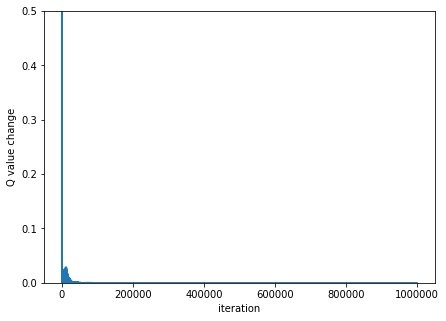

In [13]:
plot_error(hist_ceQ, "figures/ceQ_2005.png")

In [14]:
# Q value for state(71)
show_table(learner_ceQ.agents[0].Q[71])
show_table(learner_ceQ.agents[1].Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,-2.290,10.0,2.231,-2.279,-3.188
W,-2.279,10.0,-0.023,-2.279,-5.421
E,-3.067,10.0,-9.062,-3.067,-7.114
N,-2.283,10.0,2.227,-2.284,-3.183
S,-2.860,10.0,-3.026,-2.854,-2.260


player B,stick,W,E,N,S
player A,,,,,
stick,2.290,-10.0,-2.231,2.279,3.188
W,2.279,-10.0,0.023,2.279,5.421
E,3.067,-10.0,9.062,3.067,7.114
N,2.283,-10.0,-2.227,2.284,3.183
S,2.860,-10.0,3.026,2.854,2.260


In [15]:
# Policy -- probablity distribution
# stick left right up down
p = learner_ceQ.p[71].reshape(5,5)
p.sum(axis=1).round(3), p.sum(axis=0).round(3) #for each agent i's marginal probabiliby, we should sum up all axis!=i

(array([0. , 0. , 0. , 0.4, 0.6]), array([0.615, 0.   , 0.   , 0.   , 0.385]))

### Compare Foe-Q and Correlated-Q Q values

* difference between Q values

In [16]:
np.round(learner_ceQ.agents[0].Q[71]-learner_foeQ.agent1.Q[71].T, 10)

array([[ 1.88e-08,  0.00e+00, -1.75e-08,  1.88e-08, -0.00e+00],
       [ 1.87e-08,  0.00e+00,  5.00e-10,  1.87e-08,  6.50e-09],
       [ 9.80e-09,  0.00e+00,  2.70e-09,  9.80e-09,  1.24e-08],
       [ 1.87e-08,  0.00e+00, -1.75e-08,  1.86e-08, -0.00e+00],
       [ 5.10e-09,  0.00e+00, -9.00e-10,  5.10e-09,  1.96e-08]])

* Given a same Q table, foe-Q and ce-Q should give the same solution

In [17]:
Q = np.array([[-25., -26., -29., -26., -36.],
              [100., 100., 100., 100., 100.],
              [ 10.,  -7., -91.,  10., -33.],
              [-28., -28., -28., -27., -37.],
              [-39., -38., -65., -39., -24.]])
learner_foeQ.agent1.Q[71] = Q
learner_foeQ.agent2.Q[71] = -Q.T

In [18]:
learner_foeQ.agent1.minmax(71)
print("p1", learner_foeQ.agent1.p[71].round(3), "V1", learner_foeQ.agent1.V[71])
learner_foeQ.agent2.minmax(71)
print("p1", learner_foeQ.agent2.p[71].round(3), "V1", learner_foeQ.agent2.V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.800000000000004
p1 [0.  0.  0.  0.6 0.4] V1 31.8


In [19]:
learner_ceQ.agents[0].Q[71] = Q.T
learner_ceQ.agents[1].Q[71] = -Q.T

learner_ceQ.solve(71)
p = learner_ceQ.p[71].reshape(5,5)
print("p1", p.sum(axis=1).round(3), "V1", learner_ceQ.agents[0].V[71])
print("p2", p.sum(axis=0).round(2), "V2", learner_ceQ.agents[1].V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.799999894036688
p2 [0.  0.  0.  0.6 0.4] V2 31.799999894036688
